In [422]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [423]:
#Leemos los archivos
homicidios = pd.read_excel("homicidios.xlsx")
homicidios_victimas = pd.read_excel("homicidios.xlsx", sheet_name="VICTIMAS")
lesiones = pd.read_excel("lesiones.xlsx")
lesiones2 = pd.read_excel("lesiones.xlsx", sheet_name = "VICTIMAS")

## EDA Homicidios ##

In [424]:
#Vemos los tipos de datos
homicidios.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

In [425]:
#Damos un vistazo general de como se compone el dataset
homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [426]:
#Chequeamos si hay datos nulos
homicidios.isna().mean()

ID                       0.000000
N_VICTIMAS               0.000000
FECHA                    0.000000
AAAA                     0.000000
MM                       0.000000
DD                       0.000000
HORA                     0.000000
HH                       0.000000
LUGAR_DEL_HECHO          0.000000
TIPO_DE_CALLE            0.000000
Calle                    0.001437
Altura                   0.814655
Cruce                    0.245690
Dirección Normalizada    0.011494
COMUNA                   0.000000
XY (CABA)                0.000000
pos x                    0.000000
pos y                    0.000000
PARTICIPANTES            0.000000
VICTIMA                  0.000000
ACUSADO                  0.000000
dtype: float64

Vemos que el dataset de homicidios tiene muchos datos nulos y muchas de esas columnas tienen todas las columnas vacias, asi que hay que eliminarlas

In [427]:
#Eliminamos las filas que tengan 5 columnas o mas con datos nulos
homicidios.dropna(thresh=5, inplace=True)

In [428]:
#Chequeamos los nulos nuevamente
homicidios.isna().mean()

ID                       0.000000
N_VICTIMAS               0.000000
FECHA                    0.000000
AAAA                     0.000000
MM                       0.000000
DD                       0.000000
HORA                     0.000000
HH                       0.000000
LUGAR_DEL_HECHO          0.000000
TIPO_DE_CALLE            0.000000
Calle                    0.001437
Altura                   0.814655
Cruce                    0.245690
Dirección Normalizada    0.011494
COMUNA                   0.000000
XY (CABA)                0.000000
pos x                    0.000000
pos y                    0.000000
PARTICIPANTES            0.000000
VICTIMA                  0.000000
ACUSADO                  0.000000
dtype: float64

In [429]:
#Chequeamos los datos duplicados
homicidios.duplicated().sum()

0

Vemos que no hay ningun dato nulo en la data

In [430]:
homicidios.describe(include="all")

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
count,696,696.000000,696,696.000000,696.000000,696.000000,696,696.0,696,696,...,129.000000,525,688,696.000000,696,696,696,696,696,696
unique,696,NaN,NaN,NaN,NaN,NaN,375,25.0,683,4,...,NaN,317,635,NaN,606,605,605,41,10,10
top,2016-0001,NaN,NaN,NaN,NaN,NaN,16:00:00,7.0,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,"PAZ, GRAL. AV.",27 DE FEBRERO AV. y ESCALADA AV.,NaN,Point (. .),.,.,PEATON-PASAJEROS,MOTO,AUTO
freq,1,NaN,NaN,NaN,NaN,NaN,10,41.0,4,429,...,NaN,14,5,NaN,14,12,12,105,295,204
mean,NaN,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,NaN,NaN,NaN,NaN,...,3336.635659,NaN,NaN,7.425287,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,...,30.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,NaN,NaN,NaN,NaN,...,1359.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,NaN,NaN,NaN,NaN,...,2551.000000,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,NaN,NaN,NaN,NaN,...,4500.000000,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,NaN,NaN,NaN,NaN,...,16080.000000,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [431]:
#Agrupamos por año y sumamos el numero total de victimas
total_por_año = homicidios.groupby("AAAA")["N_VICTIMAS"].sum().reset_index()

In [432]:
total_por_año

,AAAA,N_VICTIMAS
0,2016,146
1,2017,140
2,2018,149
3,2019,104
4,2020,81
5,2021,97


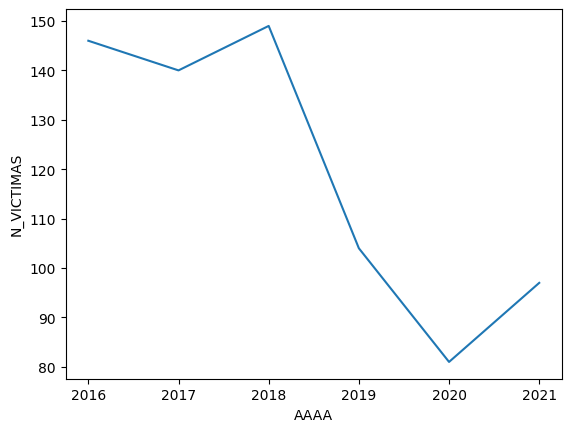

In [433]:
#Graficamos el total de victimas por año
sns.lineplot(data=total_por_año, x="AAAA", y="N_VICTIMAS")
plt.show()

Podemos ver que del 2016 al 2019 fallecían mas de 100 personas al año por accidentes de tránsito, pero este numero en 2020 y 2021 se redujo mucho debido a la pandemia ya que las personas circulaban menos por la calle

In [434]:
#Agrupamos por la fecha y sumamos el numero de victimas
total_por_dia = homicidios.groupby("FECHA")["N_VICTIMAS"].sum().reset_index()
#Chequeamos el valor maximo de fallecimientos en un dia
total_por_dia["N_VICTIMAS"].max()

3

In [435]:
#Filtramos en que dias fallecieron 3 personas
total_por_dia[total_por_dia["N_VICTIMAS"] == 3.0]

,FECHA,N_VICTIMAS
11,2016-02-17,3
13,2016-02-28,3
44,2016-06-13,3
101,2016-11-26,3
121,2017-01-16,3
133,2017-02-26,3
139,2017-03-23,3
215,2017-11-19,3
224,2017-12-11,3
246,2018-02-17,3


In [436]:
#Nos fijamos en cuantos dias murieron 3 personas
len(total_por_dia[total_por_dia["N_VICTIMAS"] == 3.0])

17

Podemos ver que en 17 días distintos murieron 3 personas

In [437]:
#El promedio de muertes que hay cuando se produce un accidente de transito
homicidios["N_VICTIMAS"].mean()

1.0301724137931034

En la mayoria de accidentes fallece solamente 1 persona

In [438]:
#Agrupamos por comuna y sumamos el numero de victimas
victimas_por_comuna = homicidios.groupby("COMUNA")["N_VICTIMAS"].sum().reset_index()
victimas_por_comuna

,COMUNA,N_VICTIMAS
0,0,2
1,1,93
2,2,25
3,3,46
4,4,79
5,5,22
6,6,22
7,7,62
8,8,67
9,9,75


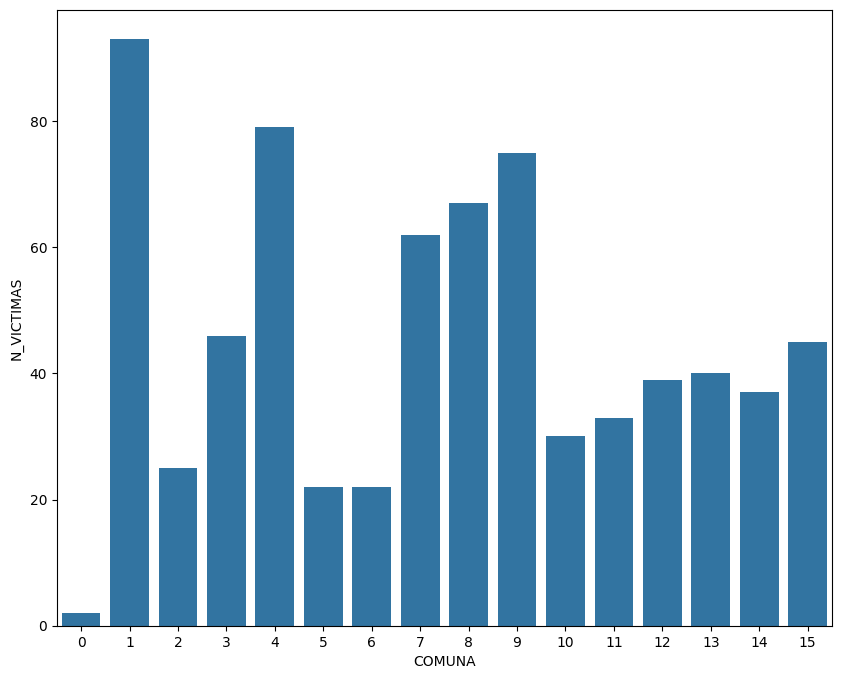

In [439]:
#Graficamos el dataframe
figura = plt.figure(figsize=(10, 8))
sns.barplot(data = victimas_por_comuna, x="COMUNA", y="N_VICTIMAS")
plt.show()

Podemos ver en el grafico que la comuna con mas victimas es la comuna 1. Esto puede ser causado porque la comuna 1 tiene muchos barrios que son muy transitados, con lo que aumenta el numero de victimas

In [440]:
#Agrupamos por mes y sumamos el numero de victimas
victimas_por_mes = homicidios.groupby("MM")["N_VICTIMAS"].sum().reset_index()
victimas_por_mes

,MM,N_VICTIMAS
0,1,62
1,2,59
2,3,56
3,4,52
4,5,60
5,6,58
6,7,51
7,8,67
8,9,51
9,10,52


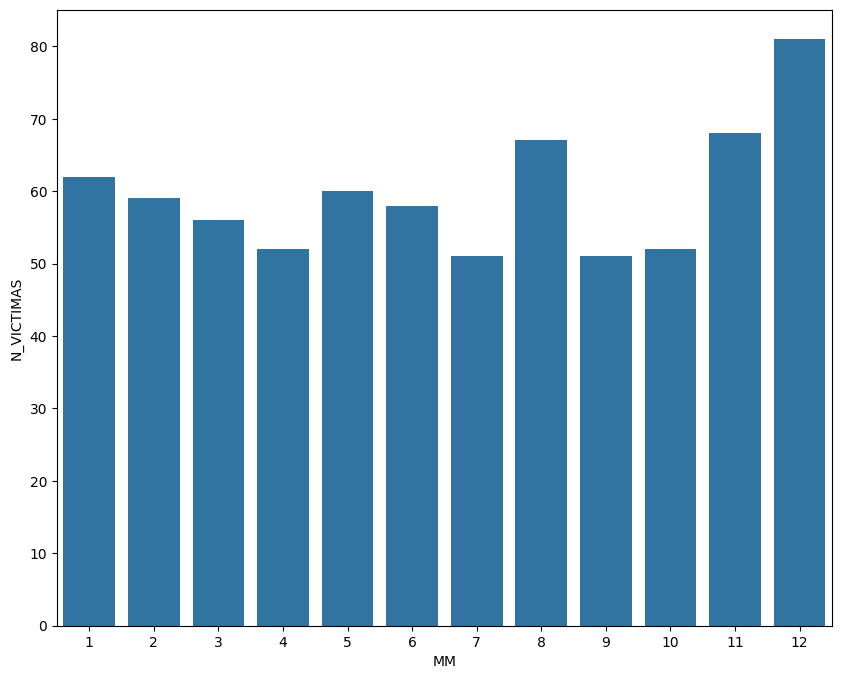

In [441]:
#Graficamos el dataframe
figura_v_mes = plt.figure(figsize=(10, 8))
sns.barplot(data = victimas_por_mes, x="MM", y="N_VICTIMAS")
plt.show()

Podemos ver en el grafico que el mayor numero de victimas es en diciembre

In [442]:
victimas_por_tipocalle = homicidios.groupby("TIPO_DE_CALLE")["N_VICTIMAS"].sum().reset_index()
victimas_por_tipocalle

,TIPO_DE_CALLE,N_VICTIMAS
0,AUTOPISTA,68
1,AVENIDA,442
2,CALLE,138
3,GRAL PAZ,69


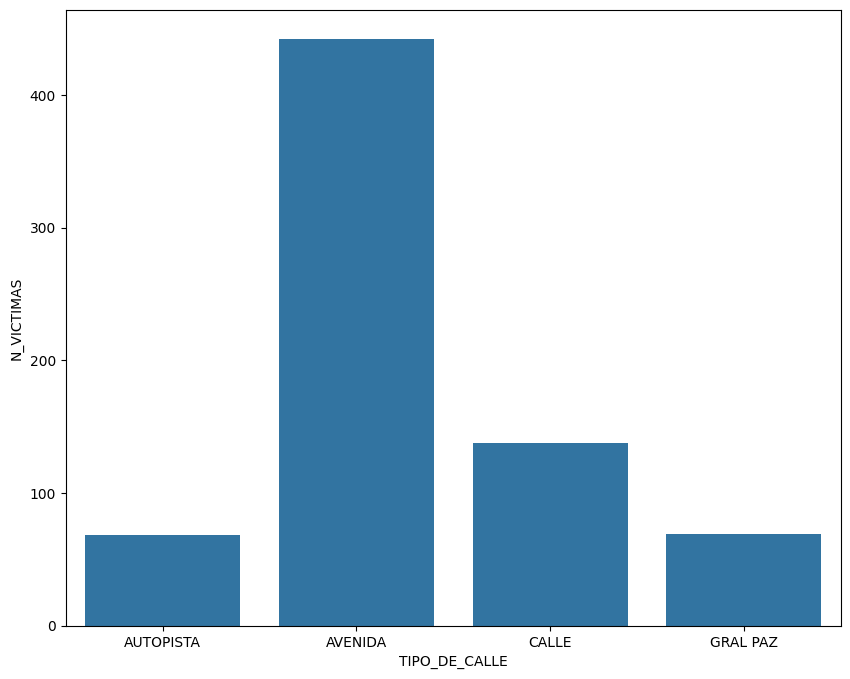

In [443]:
figura_v_mes = plt.figure(figsize=(10, 8))
sns.barplot(data = victimas_por_tipocalle, x="TIPO_DE_CALLE", y="N_VICTIMAS")
plt.show()

El mayor numero de victimas lo tienen las avenidas, esto puede ser porque circulan mas vehiculos y peatones que en otros lugares

In [444]:
#Agrupamos por participantes y sumamos el numero de victimas
total_por_participantes = homicidios.groupby("PARTICIPANTES")["N_VICTIMAS"].sum().reset_index()
total_por_participantes

,PARTICIPANTES,N_VICTIMAS
0,AUTO-AUTO,33
1,AUTO-CARGAS,15
2,AUTO-MOVIL,1
3,AUTO-OBJETO FIJO,28
4,AUTO-PASAJEROS,10
5,AUTO-SD,4
6,BICICLETA-AUTO,8
7,BICICLETA-CARGAS,10
8,BICICLETA-OTRO,1
9,BICICLETA-PASAJEROS,8


In [445]:
#Vemos el valor maximo de victimas del dataframe
total_por_participantes["N_VICTIMAS"].max()

105

In [446]:
#Vemos que participantes tienen el numero maximo de victimas
total_por_participantes[total_por_participantes["N_VICTIMAS"] == 105.0]

,PARTICIPANTES,N_VICTIMAS
34,PEATON-PASAJEROS,105


El mayor numero de victimas lo tiene el tipo de homicidio de peaton-pasajeros

In [447]:
#Agrupamos por la hora aproximada y sumamos el numero de victimas
total_por_hh = homicidios.groupby("HH")["N_VICTIMAS"].sum().reset_index()

In [448]:
#Eliminamos la ultima fila que no dice una hora si no que dice SD
total_por_hh = total_por_hh.drop(24)
#Pasamos la columna a entero
total_por_hh["HH"] = total_por_hh["HH"].astype(int)
#Ordenamos por hora
total_por_hh.sort_values(by="HH", inplace=True, ascending=True)
total_por_hh.reset_index(drop=True, inplace=True)
total_por_hh

,HH,N_VICTIMAS
0,0,23
1,1,25
2,2,18
3,3,26
4,4,27
5,5,39
6,6,42
7,7,43
8,8,31
9,9,37


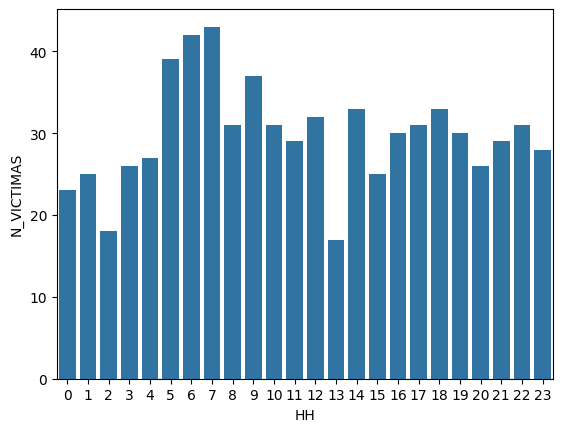

In [449]:
sns.barplot(data = total_por_hh, x="HH", y="N_VICTIMAS")
plt.show()

Vemos que entre las 5 y las 7 es mas probable que sucedan homicidios

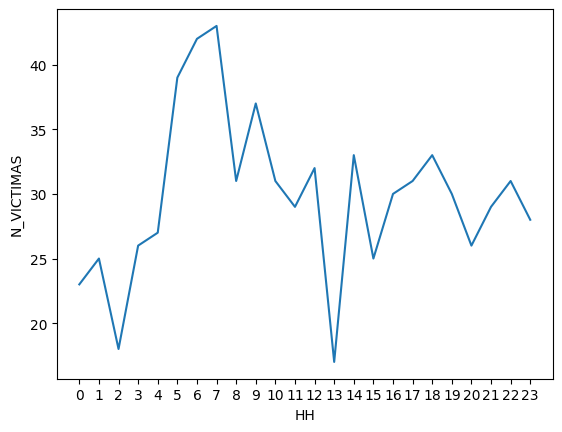

In [450]:
sns.lineplot(data = total_por_hh, x="HH", y="N_VICTIMAS")
plt.xticks(range(min(total_por_hh['HH']), max(total_por_hh['HH'])+1, 1))
plt.show()

Vemos que en la hora que mas probable es que ocurra un accidente de transito es a las 7 AM y que a la mañana entre las 5 y las 7 tambien suceden muchos de los accidentes

In [451]:
#Agrupamos por la hora aproximada y sumamos el numero de victimas
total_victimas = homicidios.groupby("VICTIMA")["N_VICTIMAS"].sum().reset_index()
total_victimas

,VICTIMA,N_VICTIMAS
0,AUTO,92
1,BICICLETA,29
2,CARGAS,7
3,MOTO,302
4,MOVIL,3
5,OBJETO FIJO,2
6,PASAJEROS,5
7,PEATON,266
8,PEATON_MOTO,2
9,SD,9


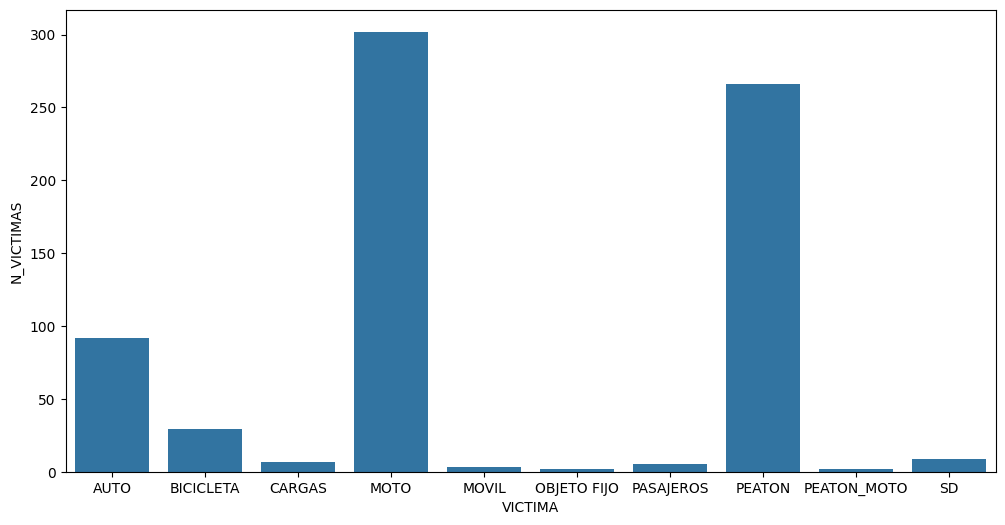

In [452]:
plt.figure(figsize=(12,6))
sns.barplot(data = total_victimas, x="VICTIMA", y="N_VICTIMAS")
plt.show()

Podemos ver que la mayoria de las victimas son motos y peatones

In [453]:
homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [454]:
#Contamos los valores y reseteamos el indice
conteo_sexo = homicidios_victimas["SEXO"].value_counts().reset_index()
conteo_sexo

,SEXO,count
0,MASCULINO,545
1,FEMENINO,166
2,SD,6


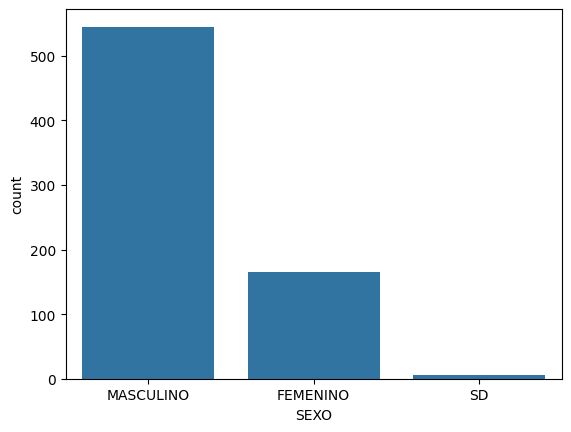

In [455]:
sns.barplot(data = conteo_sexo, x ="SEXO", y= "count")
plt.show()

Podemos ver que la mayoria de las victimas son de genero masculino

Voy a guardar el archivo de homicidios sin las filas que tienen todos los datos vacios

In [456]:

# Crear un objeto ExcelWriter
with pd.ExcelWriter('homicidios_sinnulos.xlsx') as writer:
    # Guardar el primer DataFrame en la primera hoja
    homicidios.to_excel(writer, sheet_name='HECHOS', index=False)

    # Guardar el segundo DataFrame en la segunda hoja
    homicidios_victimas.to_excel(writer, sheet_name='VICTIMAS', index=False)


## Conclusión sobre dataset de homicidios ##

- El dataset tenia muchas filas con todos los datos vacios

- El dataset no tenia duplicados

- El año con mas victimas es 2018

- Con la pandemia se redujeron mucho los homicidios

- Lo maximo de gente que fallecia en un dia son 3

- Fallecieron 3 personas el mismo día en 17 dias distintos

- Mayormente cuando sucede un accidente y fallece alguien, solamente fallece una persona en promedio

- La comuna con mas victimas es la 1

- El mes con mas homicidios diciembre

- Mayormente los accidentes se dan en avenidas

- La tasa de participantes de homicidios se da mayormente entre peaton-pasajeros

- La hora en la que es mas frecuente que suceda un homicidio es entre las 6 y las 7

- El mayor numero de victimas lo tienen las personas que van en moto

- La mayoria de victimas son hombres

## Lesiones ##

In [457]:
lesiones

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,SD,1,...,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22:00:00,22,LINIERS VIRREY y MORENO,5,...,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


In [458]:
#Vemos los tipos de datos que tiene el dataframe de lesiones
lesiones.dtypes

id                        object
n_victimas                 int64
aaaa                       int64
mm                         int64
dd                         int64
fecha                     object
hora                      object
franja_hora               object
direccion_normalizada     object
comuna                    object
tipo_calle                object
otra_direccion            object
calle                     object
altura                   float64
cruce                     object
geocodificacion_CABA      object
longitud                  object
latutid                   object
victima                   object
acusado                   object
participantes             object
moto                      object
auto                      object
transporte_publico        object
camion                    object
ciclista                  object
gravedad                  object
dtype: object

In [459]:
lesiones.describe(include="all")

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
count,23785,23785.000000,23785.000000,23785.000000,23785.000000,23785,23785,23780.0,23732,23616.0,...,23523,23785,23785,23785,23692,23692,23692,23692,23692,23785
unique,23785,NaN,NaN,NaN,NaN,1097,2043,25.0,8933,17.0,...,13757,14,14,128,3,3,3,3,3,5
top,LC-2019-0000179,NaN,NaN,NaN,NaN,2021-12-17 00:00:00,00:00:00,17.0,SD,1.0,...,SD,SD,SD,SD-SD,x,SD,SD,SD,SD,SD
freq,1,NaN,NaN,NaN,NaN,55,359,1734.0,10815,2526.0,...,1209,10733,15288,10535,9077,12543,11801,12708,11353,23056
mean,NaN,1.160563,2019.901324,6.597561,15.616355,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.551571,0.859432,3.476955,8.700047,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,2019.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,2019.000000,3.000000,8.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.000000,2020.000000,7.000000,16.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,2021.000000,10.000000,23.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [460]:
#Chequeamos valores nulos
lesiones.isna().mean()

id                       0.000000
n_victimas               0.000000
aaaa                     0.000000
mm                       0.000000
dd                       0.000000
fecha                    0.000000
hora                     0.000000
franja_hora              0.000210
direccion_normalizada    0.002228
comuna                   0.007105
tipo_calle               0.000000
otra_direccion           0.000000
calle                    0.459029
altura                   0.463065
cruce                    0.604499
geocodificacion_CABA     0.001640
longitud                 0.011015
latutid                  0.011015
victima                  0.000000
acusado                  0.000000
participantes            0.000000
moto                     0.003910
auto                     0.003910
transporte_publico       0.003910
camion                   0.003910
ciclista                 0.003910
gravedad                 0.000000
dtype: float64

Vemos que hay pocos datos nulos en nuestro data frame

In [461]:
#Chequeamos la cantidad de datos duplicados
lesiones.duplicated().sum()

0

In [462]:
#Agrupamos por año y sumamos las victimas
lesiones_por_año = lesiones.groupby("aaaa")["n_victimas"].sum().reset_index()
lesiones_por_año

,aaaa,n_victimas
0,2019,11792
1,2020,6855
2,2021,8957


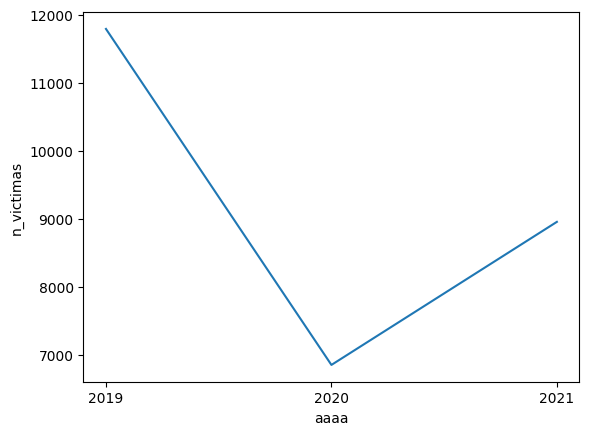

In [463]:
sns.lineplot(data=lesiones_por_año, x="aaaa", y="n_victimas")
plt.xticks(range(min(lesiones_por_año['aaaa']), max(lesiones_por_año['aaaa'])+1, 1))
plt.show()

Podemos ver que los numeros de victimas que tuvieron lesiones disminuyeron por la pandemia, ya que transitaba menos gente

In [464]:
#Agrupamos por mes y sumamos el numero de victimas
lesiones_por_mes = lesiones.groupby("mm")["n_victimas"].sum().reset_index()
lesiones_por_mes

,mm,n_victimas
0,1,2229
1,2,2290
2,3,2501
3,4,2034
4,5,1892
5,6,2153
6,7,2360
7,8,2420
8,9,2363
9,10,2762


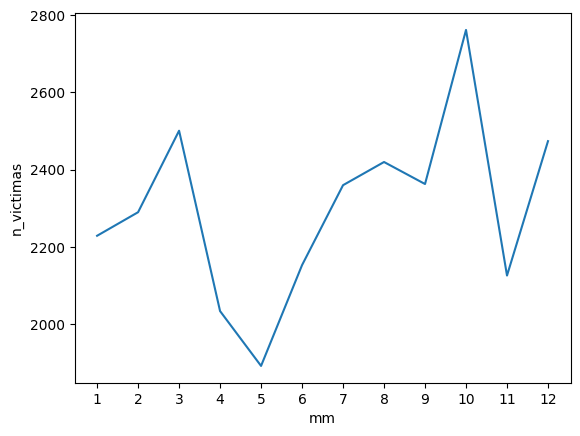

In [465]:
sns.lineplot(data = lesiones_por_mes, x="mm", y="n_victimas")
plt.xticks(range(min(lesiones_por_mes['mm']), max(lesiones_por_mes['mm'])+1, 1))
plt.show()

El numero de victimas mas alto se da en octubre y el mas bajo en mayo

In [466]:
#Agrupamos por la franja horaria y sumamos el numero de victimas
lesiones_por_franja = lesiones.groupby("franja_hora")["n_victimas"].sum().reset_index()
#Eliminamos la columna que tiene sd
lesiones_por_franja = lesiones_por_franja[lesiones_por_franja["franja_hora"] != "sd"]
#Cambiamos el tipo de la columna por int para poder ordenarla
lesiones_por_franja["franja_hora"] = lesiones_por_franja["franja_hora"].astype(int)

In [467]:
#Ordenamos los valores por la franja horaria de manera ascendente
lesiones_por_franja = lesiones_por_franja.sort_values(by="franja_hora", ascending=True)
#Reseteamos los indices
lesiones_por_franja.reset_index(drop=True, inplace= True)
lesiones_por_franja

,franja_hora,n_victimas
0,0,923
1,1,420
2,2,275
3,3,207
4,4,229
5,5,347
6,6,523
7,7,835
8,8,1234
9,9,1290


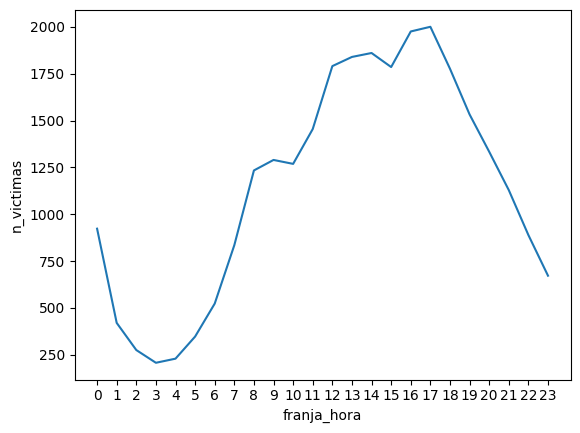

In [468]:
sns.lineplot(data = lesiones_por_franja, x="franja_hora", y="n_victimas")
plt.xticks(range(min(lesiones_por_franja['franja_hora']), max(lesiones_por_franja['franja_hora'])+1, 1))
plt.show()

Vemos que la mayoria de accidentes se dan por la tarde y disminuye mucho en la madrugada

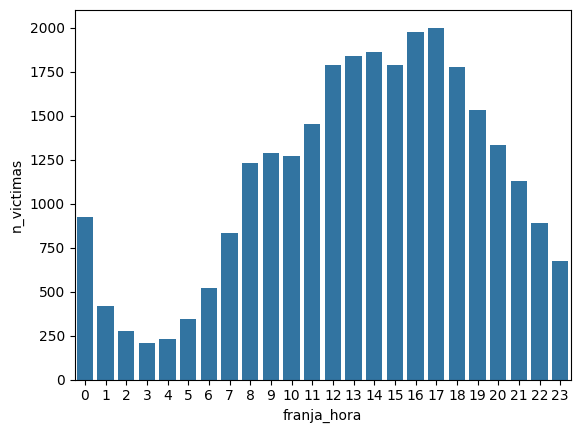

In [469]:
sns.barplot(data = lesiones_por_franja, x= "franja_hora", y="n_victimas")
plt.show()

Vemos que entre las 12 am y las 5 am disminuyen los accidentes, luego a partir de las 6 am comienzan a subir y tiende a bajar a partir de las 6 aproximadamente

In [470]:
#Agrupamos por el tipo de victimas y sumamos el numero de victimas
lesiones_victimas = lesiones.groupby("victima")["n_victimas"].sum().reset_index()
lesiones_victimas = lesiones_victimas.sort_values(by= "n_victimas", ascending=False)
lesiones_victimas.reset_index(drop=True, inplace=True)
lesiones_victimas

,victima,n_victimas
0,SD,12824
1,MOTO,5927
2,AUTO,2606
3,CICLISTA,2263
4,PEATON,2157
5,TRANSPORTE PUBLICO,905
6,CAMIONETA,257
7,TAXI,247
8,MOVIL,139
9,MIXTO,113


In [471]:
#Agrupamos por comunas y sumamos el numero de victimas
lesiones_por_comuna = lesiones.groupby("comuna")["n_victimas"].sum().reset_index()
#Eliminamos los datos sin especificar
lesiones_por_comuna = lesiones_por_comuna[lesiones_por_comuna["comuna"] != "SD"]
lesiones_por_comuna = lesiones_por_comuna[lesiones_por_comuna["comuna"] != "No Especificada"]

#Cambiamos el tipo de dato de la columna a entero para ordenarlo de menor a mayor
lesiones_por_comuna["comuna"] = lesiones_por_comuna["comuna"].astype(int)

#Ordenamos las comunas
lesiones_por_comuna = lesiones_por_comuna.sort_values(by="comuna")

lesiones_por_comuna

,comuna,n_victimas
0,1,2838
1,2,996
2,3,1957
3,4,2134
4,5,1378
5,6,1082
6,7,1757
7,8,1353
8,9,2075
9,10,1538


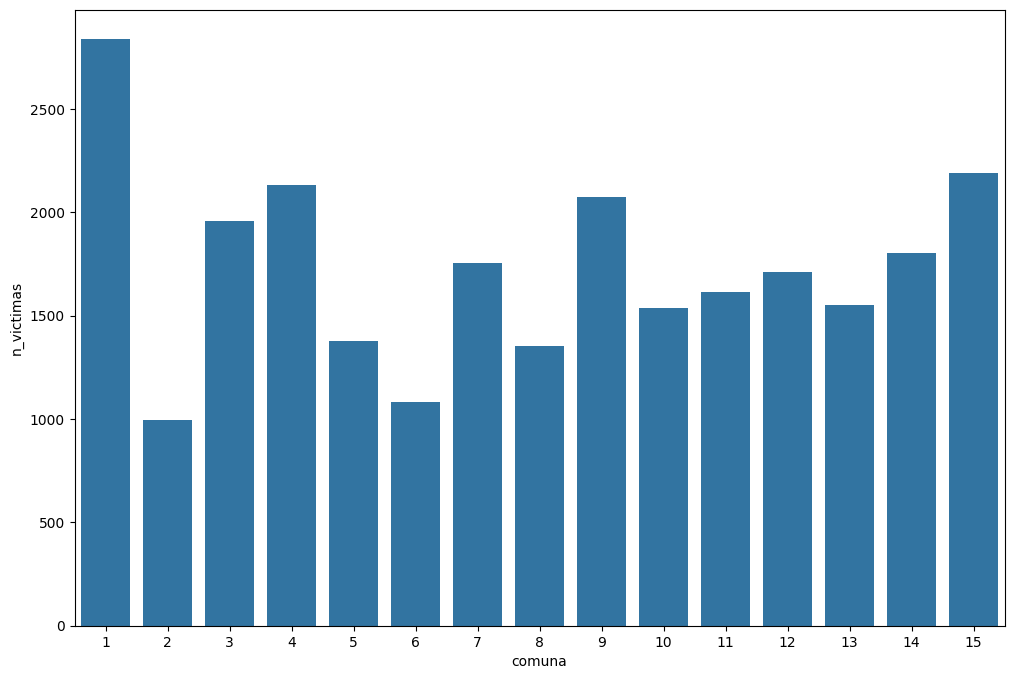

In [472]:
plt.figure(figsize=(12, 8))
sns.barplot(data = lesiones_por_comuna, x="comuna", y="n_victimas")
plt.show()

Vemos que nuevamente el numero de victimas pero ahora de lesiones es el mas alto en la comuna 1

In [473]:
#Agrupamos por participantes y sumamos el numero de victimas
lesiones_participantes = lesiones.groupby("participantes")["n_victimas"].sum().reset_index()
lesiones_participantes

,participantes,n_victimas
0,AUTO-AUTO,778
1,AUTO-CAMION,79
2,AUTO-CAMIONETA,160
3,AUTO-CICLISTA,1
4,AUTO-MOTO,17
...,...,...
123,UTILITARIO-AUTO,1
124,UTILITARIO-CAMION,1
125,UTILITARIO-SD,12
126,UTILITARIO-TAXI,1


In [474]:
#Ordenamos los valores por el numero de victimas
lesiones_participantes = lesiones_participantes.sort_values(by="n_victimas", ascending=False)
#Reseteamos el indice
lesiones_participantes.reset_index(drop=True, inplace=True)
lesiones_participantes

,participantes,n_victimas
0,SD-SD,12611
1,MOTO-AUTO,2384
2,MOTO-SD,1985
3,AUTO-SD,1253
4,CICLISTA-SD,816
...,...,...
123,MOVIL-MOTO,1
124,MOVIL-UTILITARIO,1
125,OTRO-AUTO,1
126,PEATON-MONOPATIN,1


In [475]:
#Hacemos el top 10 de los participantes
lesiones_participantes_top10 = lesiones_participantes.head(10)
lesiones_participantes_top10

,participantes,n_victimas
0,SD-SD,12611
1,MOTO-AUTO,2384
2,MOTO-SD,1985
3,AUTO-SD,1253
4,CICLISTA-SD,816
5,CICLISTA-AUTO,807
6,AUTO-AUTO,778
7,PEATON-SD,707
8,PEATON-AUTO,689
9,TRANSPORTE PUBLICO-TRANSPORTE PUBLICO,443


Vemos que el numero de victimas mas alto lo tienen los participantes que no tienen datos, y le siguen moto-auto

In [476]:
#Sacamos el promedio del numero de victimas
lesiones["n_victimas"].mean()

1.1605633802816901

Vemos que en promedio cuando sucede un accidente, las victimas lesionadas suelen una sola persona

In [477]:
lesiones2

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


In [478]:
#Contamos los valores y reseteamos el indice
conteo_sexo_lesiones = lesiones2["SEXO"].value_counts().reset_index()
conteo_sexo_lesiones

,SEXO,count
0,Varon,16796
1,Mujer,8246
2,SD,1929
3,sd,299
4,varon,226
5,MUJER,62
6,mujer,46
7,Mujer,1


Vemos que los generos varian mucho entre mayúsculas y minusculas, por lo que voy a optar por poner todo en minusculas para poder analizar los datos con mayor facilidad

In [479]:
#Aplicamos el lower a toda la columna
lesiones2["SEXO"] = lesiones2["SEXO"].str.lower()
lesiones2

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,sd,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,varon,32,SD


In [480]:
#Hacemos el conteo nuevamente
conteo_sexo_lesiones = lesiones2["SEXO"].value_counts().reset_index()
conteo_sexo_lesiones

,SEXO,count
0,varon,17022
1,mujer,8354
2,sd,2228
3,mujer,1


Hay un valor suelto de mujer que contiene solo 1, por lo que voy a eliminarlo y sumarle 1 al otro 

In [481]:
#Eliminamos el valor de mujer duplicado que contiene 1 que se encuentra en el indice 3
conteo_sexo_lesiones.drop(3, inplace=True)
#Agregamos 1 al valor de mujer
conteo_sexo_lesiones["count"][1] = conteo_sexo_lesiones["count"][1] + 1
conteo_sexo_lesiones

,SEXO,count
0,varon,17022
1,mujer,8355
2,sd,2228


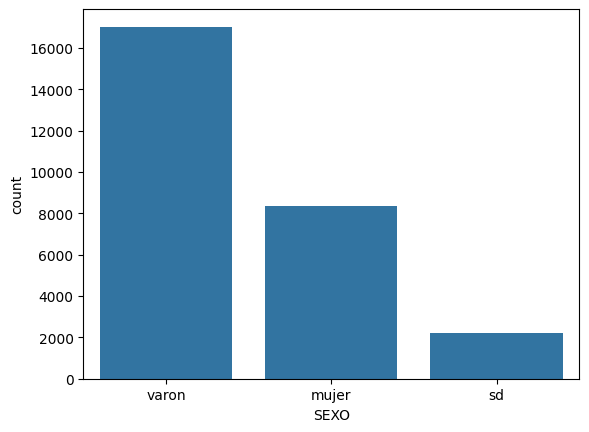

In [482]:
sns.barplot(data = conteo_sexo_lesiones, x="SEXO", y= "count")
plt.show()

Vemos que tambien en lesiones, los hombres tienen mas victimas registradas

## Conclusiones sobre dataset de lesiones ##

- No tiene muchos valores nulos

- No tiene valores duplicados

- El año con mas victimas es el año 2019

- En el año 2020 y 2021 se redujeron drasticamente el numero de lesionados debido a la pandemia

- De todos los años, el mes con mas victimas es octubre

- De todos los años, el mes con menos victimas es mayo

- Por la tarde es donde hay mas victimas

- A partir de la 1 AM hasta las 6 AM bajan considerablemente el numero de victimas

- La comuna con mas victimas es la comuna 1

- La mayoria de participantes de los accidentes no estan registrados, pero el tipo de accidente registrado mas comun es entre motos y autos

- Cuando hay un accidente mayormente la victima es una sola